# Splitting Train and Test into csv

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('abalone.csv')
df.head(1)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15


In [2]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df.iloc[:,:7],df.iloc[:,-1],random_state=42,test_size=0.3) #splitting the data

In [3]:
## Making the test and train csv files
xtrain['Rings'] = ytrain
xtest['Rings'] = ytest

p1 = 'abalone_test.csv'
p2 = 'abalone_train.csv'

xtest.to_csv(p1, index=False)
xtrain.to_csv(p2, index=False)

# Regression Problem/ Pearson Relation

In [4]:
train = pd.read_csv('abalone_train.csv')

In [5]:
#pearson Correlation
def pearson_corr(x,y):
    num = np.dot(x - x.mean(),(y-y.mean()).T)
    den = np.std(x) * np.std(y) * x.shape[0]
    return num/den

### Finding the best col 

In [6]:
best_col = None
max_corr = 0
for i in train.drop(columns=['Rings']).columns:
    corr = pearson_corr(train[i],train['Rings'])
    if(corr > max_corr):
        best_col = i
        max_corr = corr
print(f"Column that has highest Pearson Correlation with Target : {best_col}")

Column that has highest Pearson Correlation with Target : Shell weight


In [7]:
X = train[best_col]
y = train['Rings']

In [8]:
## Forming the Linear Regressin class
class LR_model():
    def __init__(self):
        self.m = None
        self.b = None

    def fit(self,X,y):
        self.m = np.dot(X - np.mean(X),(y-np.mean(y)).T)/sum(pow(X - np.mean(X),2))
        self.b = np.mean(y) - np.mean(X)*self.m

        print(f"m = {self.m}, b = {self.b}")

    def predict(self,xtest):
        return self.m * xtest + self.b

In [9]:
lr = LR_model() ##lr object created
lr.fit(X,y)
ypred_train = lr.predict(X)

m = 14.40180027163748, b = 6.508970204283244


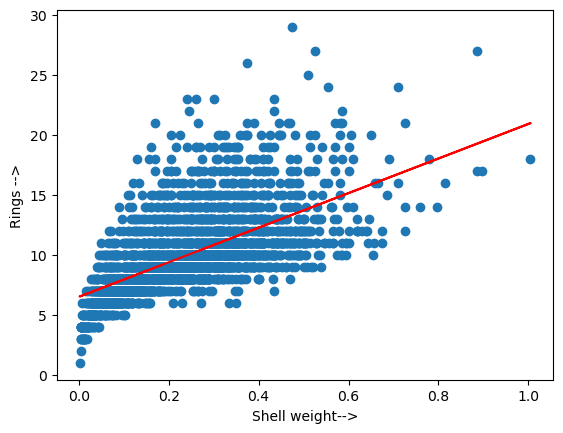

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.xlabel(best_col + "-->")
plt.ylabel("Rings -->")
plt.plot(X,ypred_train,c='r')

# RMSE

In [11]:
def RMSE(a,b):
    sum_error_sq = pow((np.sum(pow(a-b,2))/len(a)) , 0.5)
    return sum_error_sq
RMSE(y,ypred_train)

2.527846339134725

# Test Data

In [12]:
test = pd.read_csv('abalone_test.csv')
X_test = test[best_col]
y_test = test['Rings']

ypred_test = lr.predict(X_test)

In [13]:
RMSE(y_test,ypred_test)

2.4679401470105424

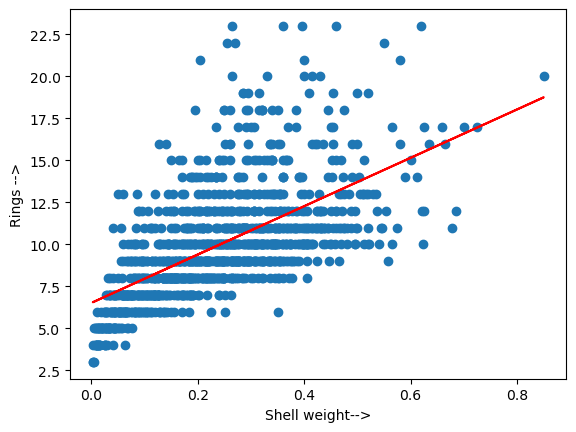

In [14]:
plt.scatter(X_test,y_test)
plt.xlabel(best_col + "-->")
plt.ylabel("Rings -->")
plt.plot(X_test,ypred_test,c='r')

# Scatter plot of Ypred vs Yactual for test

Text(0, 0.5, 'Predicted Test target')

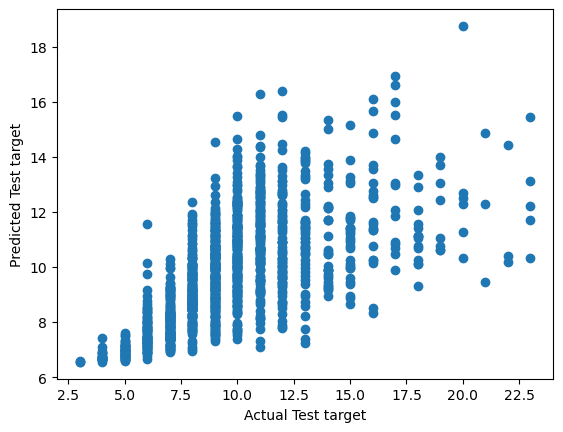

In [15]:
plt.scatter(y_test,ypred_test)
plt.xlabel('Actual Test target')
plt.ylabel('Predicted Test target')

# Polynomial Regression

In [16]:
def trf_X(x,deg):
    x = np.array(x).reshape(1,len(x))
    for i in range(2,deg+1):
        x = np.insert(x,x.shape[0],pow(x[0,:],i),axis = 0)
    return x

In [17]:
X_poly = train[best_col]
y_poly = train['Rings']

In [18]:
## Polynomial regression class
class Poly_Reg():
    def __init__(self,deg):
        self.m = np.ones(deg + 1)
        self.deg = deg

    def fit(self,X,y):
        X = trf_X(X,self.deg).T
        X = np.insert(X,0,1,axis=1)
        
        self.w = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
        # print(f"Coeff = {self.w}")

    def predict(self,test):
        test = trf_X(test,self.deg).T
        test = np.insert(test,0,1,axis=1)

        return np.dot(test,self.w)

In [24]:
## RMSE for polynomials
def RMSE_poly(degrees,x,y,xtest,ytest):
    RMSE_vals = []
    for i in degrees:
        poly_reg = Poly_Reg(deg=i)
        poly_reg.fit(x,y)

        ypred = poly_reg.predict(xtest)

        RMSE_vals.append(RMSE(ytest,ypred))

    for i in range(len(degrees)):
        print(f"RMSE for degree {degrees[i]} = {RMSE_vals[i]}")
    plt.bar(degrees,RMSE_vals)
    plt.xlabel('Degree -->')
    plt.ylabel('RMSE -->')
    plt.show()

## Train data

RMSE for degree 2 = 2.499297353079151
RMSE for degree 3 = 2.47566923544359
RMSE for degree 4 = 2.4671948386515967
RMSE for degree 5 = 2.465950052620803


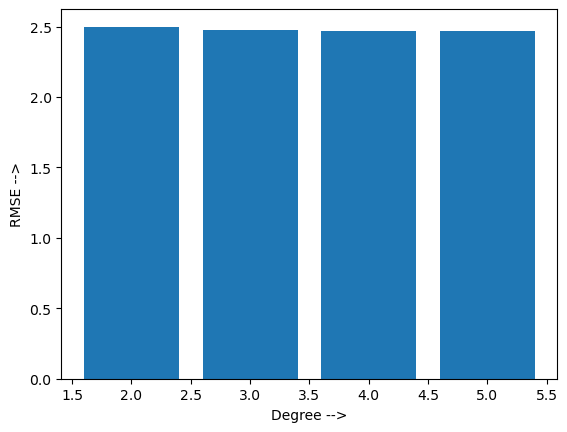

In [25]:
RMSE_poly([2,3,4,5],X_poly,y_poly,X_poly,y_poly)

## Test Data

RMSE for degree 2 = 2.4337609762689407
RMSE for degree 3 = 2.41062168183979
RMSE for degree 4 = 2.408325167064186
RMSE for degree 5 = 2.4095435183922063


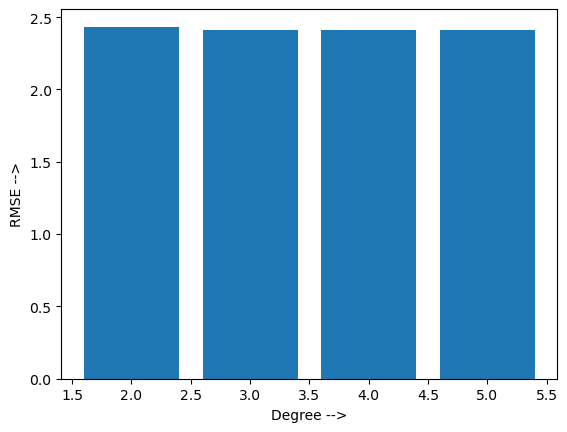

In [26]:
RMSE_poly([2,3,4,5],X_poly,y_poly,test[best_col],test['Rings'])

# Best Fit Model

In [27]:
def best_model(degrees,x,y,xtest,ytest):
    RMSE_vals = []
    for i in degrees:  ## checking for all the degrees
        poly_reg = Poly_Reg(deg=i)
        poly_reg.fit(x,y)
        ypred = poly_reg.predict(xtest)
        RMSE_vals.append(RMSE(ytest,ypred))

    best_deg = 0 
    min_rmse = 100
    print(RMSE_vals)
    print(degrees)
    for i in range(len(degrees)):
        if(RMSE_vals[i] < min_rmse):
            min_rmse = RMSE_vals[i]
            best_deg = degrees[i]

    poly_reg1 = Poly_Reg(deg=best_deg)
    poly_reg1.fit(x,y)
    ypred = poly_reg1.predict(xtest)

    plt.scatter(xtest,ytest)
    plt.xlabel(best_col + "-->")
    plt.title(f"Best for degree = {best_deg}")
    plt.ylabel("Rings -->")
    plt.scatter(xtest,ypred,c = 'r')
    plt.show()

[2.527846339134725, 2.499297353079151, 2.47566923544359, 2.4671948386515967, 2.465950052620803, 2.4647416122266788, 2.464637543391471, 2.4633941767182916, 2.462978233119245, 2.4622986379258407, 2.461558713109472, 2.4615083593747324, 2.4621186467649463, 2.4620326907461196, 2.461621642339639]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


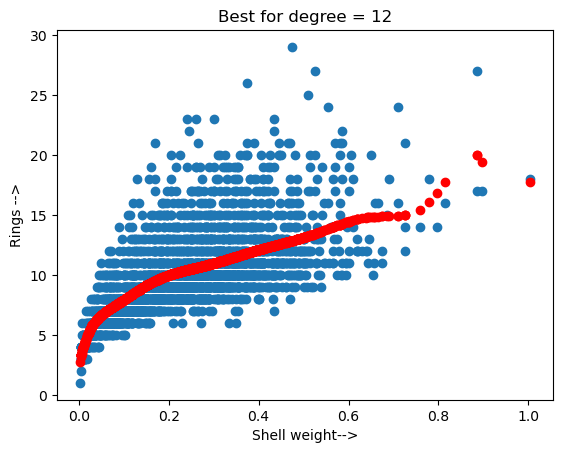

In [28]:
best_model([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],X_poly,y_poly,X_poly,y_poly)